In [5]:
import numpy as np
import pickle

data = pickle.load(open("/Users/lgarcia/papers/nuance/workflows/tess_injection_recovery/data/153193474/injected/7.fluxes", "rb"))

In [47]:
def bens_detrend(time, flux, n=5):
    def rotation_period(time, flux):
        """rotation period based on LS periodogram"""
        from astropy.stats import LombScargle
        ls = LombScargle(time, flux)
        frequency, power = ls.autopower(minimum_frequency=1/10, maximum_frequency=1/0.1)
        period = 1/frequency[np.argmax(power)]
        return period

    def subtract_sinusoid(time, flux, period):
        X = np.vstack([
            np.ones(len(time)),
            np.cos(2*np.pi/period * time),
            np.sin(2*np.pi/period * time),
        ]).T

        w = np.linalg.lstsq(X, flux, rcond=None)[0]
        model = np.dot(X, w)

        return flux - model

    _flux = flux.copy()
    for _ in range(n):
        period = rotation_period(time, _flux)
        _flux = subtract_sinusoid(time, _flux, period)
    return _flux

In [48]:
detrended_flux = bens_detrend(time, flux)

(5.0, 5.5)

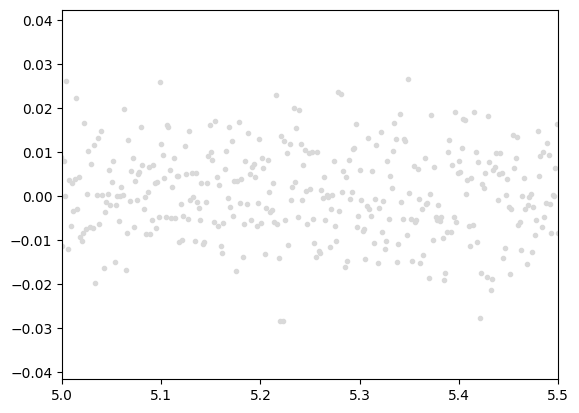

In [49]:
plt.plot(time, detrended_flux, ".", c='0.85')
plt.xlim(5,5.5)

In [31]:

time = data["time"]
flux = data["flux"]
period = rotation_period(time, flux)

def subtract_sinusoid(time, flux, period):
    X = np.vstack([
        np.ones(len(time)),
        np.cos(2*np.pi/period * time),
        np.sin(2*np.pi/period * time),
    ]).T

    w = np.linalg.lstsq(X, flux, rcond=None)[0]
    model = np.dot(X, w)

    return flux - model

(5.0, 5.5)

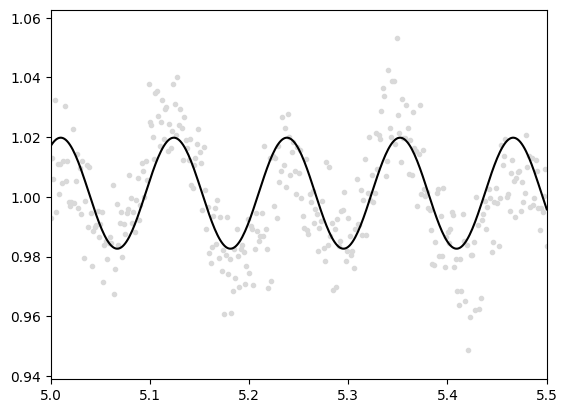

In [33]:
import matplotlib.pyplot as plt

plt.plot(time, flux, ".", c='0.85')
plt.plot(time, model, "k-")
plt.xlim(5,5.5)

In [14]:
rotation_period(data['time'], data['flux'])

0.1140225158623743